# Project – Low-rank approximation techniques

### Topic
Volume maximization for cross approximation

### Authors 
Anna Paulish & Fabio Matti

### Imports

In [36]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [37]:
import numpy as np
import matplotlib.pyplot as plt

from src.algorithms import ACA_SPSD, Algorithm1
from src.matrices import get_A1, get_A2, get_A3, get_A4
from src.helpers import volume, ACA_error, max_volume_index_set, ACA_upper_bounds

## Task 1

Set the parameters $n$ and $k$

In [38]:
n = 7
k = 6

Get the matrix $A_1$

In [39]:
A1 = get_A1(n=n)

Find index set using adaptive cross approximation and using direct search

In [40]:
I = ACA_SPSD(A1, k=k)
J = max_volume_index_set(A1, k)

Compare volumes of ACA submatrix $A_1(I, I)$ to maximum volume submatrix $A_1(J, J)$

In [41]:
vol_II = volume(A1[np.ix_(I, I)])
vol_JJ = volume(A1[np.ix_(J, J)])

print("Volume of A_1(I, I) = {:.3e}".format(vol_II))
print("Volume of A_1(J, J) = {:.3e}".format(vol_JJ))

Volume of A_1(I, I) = 1.311e-16
Volume of A_1(J, J) = 1.000e-13


## Task 2

Find index set using `Algorithm1`

In [42]:
I1 = Algorithm1(A1, k=k)
vol_I1 = volume(A1[np.ix_(I1, I1)])

print("Volume of A_1(I1, I1) = {:.3e}".format(vol_I1))

Volume of A_1(I1, I1) = 1.000e-13


Compare accuracies of the two algorithms

In [43]:
error_II = ACA_error(A1, I, ord=np.inf)
error_I1 = ACA_error(A1, I1, ord=np.inf)

print("Error of ACA from ACA_SPSD = {:.3e}".format(error_II))
print("Error of ACA from Algorithm1 = {:.3e}".format(error_I1))

Error of ACA from ACA_SPSD = 4.437e-07
Error of ACA from Algorithm1 = 5.814e-10


## Task 3

Set the parameters $n$ and specify range of $k \in \{1, ..., K\}$

In [44]:
n = 200
K = 100
k_list = np.arange(1, K+1, dtype=int)

Get the matrix $A_2$

In [45]:
A2 = get_A2(n=n)

Plot progression of cross approximations for $A_2$

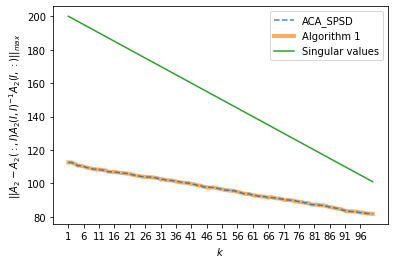

In [46]:
A2_errors = np.empty(len(k_list))

for idx, k in enumerate(k_list):
    I = ACA_SPSD(A2, k)
    A2_errors[idx] = ACA_error(A2, I, ord='max')

A2_errors_algorithm1 = np.empty(len(k_list))

for idx, k in enumerate(k_list):
    I1 = Algorithm1(A2, k)
    A2_errors_algorithm1[idx] = ACA_error(A2, I1, ord='max')

A2_upper_bounds, A2_singular_values = ACA_upper_bounds(A2, K)

plt.plot(k_list, A2_errors, label = "ACA_SPSD", alpha=0.85, linestyle ='--')
plt.plot(k_list, A2_errors_algorithm1, label = "Algorithm 1", alpha=0.65, linewidth = 4, zorder=-1)
plt.plot(k_list, A2_singular_values, label = "Singular values")
#plt.plot(k_list, A2_upper_bounds, label = "ACA upper bound")

plt.legend()
#plt.yscale('log')

plt.xticks(np.arange(1,K+1,step=5))
plt.xlabel("$k$")
plt.ylabel("$||A_2 - A_2(:, I) A_2(I, I)^{-1} A_2(I, :)||_{max}$")
plt.show()

Get the matrix $A_3$

In [47]:
A3 = get_A3(n=n)

Plot progression of cross approximations for $A_3$

In [48]:
K = 20  # Hilbert matrix is numerically not invertible for K >~ 20
k_list = np.arange(1, K+1, dtype=int)

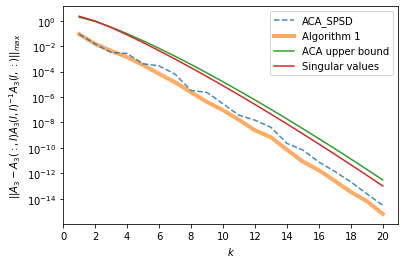

In [49]:
A3_errors = np.empty(len(k_list))

for idx, k in enumerate(k_list):
    I = ACA_SPSD(A3, k)
    A3_errors[idx] = ACA_error(A3, I, ord='max')

# Same for Algorithm 1
A3_errors_algorithm1  = np.empty(len(k_list))

for idx, k in enumerate(k_list):
    I1 = Algorithm1(A3, k)
    A3_errors_algorithm1[idx] = ACA_error(A3, I1, ord='max')

A3_upper_bounds, A3_singular_values = ACA_upper_bounds(A3, K)

plt.plot(k_list, A3_errors, label = "ACA_SPSD", alpha=0.85, linestyle ='--')
plt.plot(k_list, A3_errors_algorithm1, label = "Algorithm 1", alpha=0.65, linewidth = 4, zorder=-1)
plt.plot(k_list,A3_upper_bounds, label = "ACA upper bound")
plt.plot(k_list, A3_singular_values, label = "Singular values")

plt.legend()
plt.yscale('log')

plt.xticks(np.arange(K+1,step=2))
plt.xlabel("$k$")
plt.ylabel("$||A_3 - A_3(:, I) A_3(I, I)^{-1} A_3(I, :)||_{max}$")
plt.show()

## Task 4

Counter example for `Algorithm1` not returning maximum volume submatrix

In [57]:
A4 = get_A4(epsilon=1e-1)
I4 = Algorithm1(A4, k=2)
J4 = np.array([2, 3])

vol_I4 = volume(A4[np.ix_(I4, I4)])
vol_J4 = volume(A4[np.ix_(J4, J4)])

print("Volume of A_4(I4, I4) = {:.3e}".format(vol_I4))
print("Volume of A_4(J4, J4) = {:.3e}".format(vol_J4))

Volume of A_4(I4, I4) = 9.900e-01
Volume of A_4(J4, J4) = 1.000e+00
